# Sprint 6. Algoritmos de aprendizaje supervisado: Regresión

## Tarea M6 T01

### Ejercicio 1: Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV )

Información sobre el Dataset:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [35]:
import pandas as pd

ruta_del_archivo = "C:/Users/acbon/Desktop/Data Science/datasets/housing data.csv"

nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(ruta_del_archivo, encoding='ISO-8859-1', names=nombres_columnas, header=None)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Antes de crear los modelos de regresión vamos a realizar una análisis exploratorio de los datos: 
Podemos observar que el DataFrame tiene 506 entradas, lo que indica que hay 506 observaciones o filas. Hay un total de 14 columnas, cada una representando una variable diferente. Este conjunto de datos es ideal para realizar análisis de regresión, en particular para predecir MEDV, el valor medio de las viviendas. Se pueden explorar correlaciones entre las características de las viviendas y su valor medio. Es posible investigar el impacto de factores socioeconómicos (como LSTAT y PTRATIO) y ambientales (como NOX y DIS) en el valor de las viviendas.


In [37]:
print(df.describe().T)

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

In [38]:
df = df.drop_duplicates()

In [39]:
print("No existe ningún null")

df.isnull().sum()

No existe ningún null


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

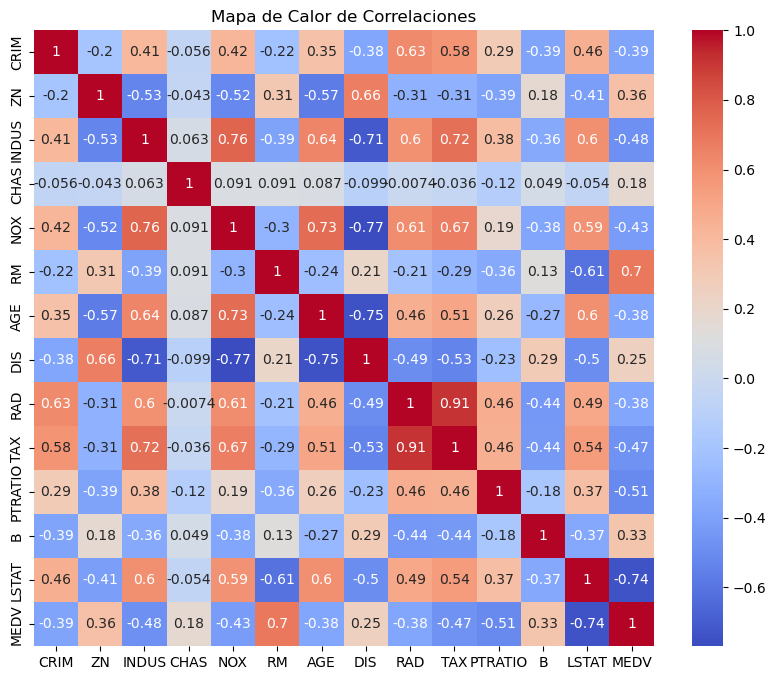

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


El mapa de calor de correlaciones muestra la relación entre las diferentes variables del conjunto de datos de viviendas de Boston. Aquí podemos observar la existencia de multicolinealidad, esta se refiere a una situación en la cual dos o más variables predictoras en un modelo de regresión múltiple están altamente correlacionadas, lo que puede dificultar la interpretación de los coeficientes individuales de las variables predictoras.

Para identificar multicolinealidad, generalmente buscamos correlaciones altas (típicamente, valores por encima de 0.70 o por debajo de -0.70) entre las variables independientes. Basándonos en el gráfico, estos son algunos de los pares de variables que muestran alta correlación y podrían ser candidatos para la exclusión o la combinación:


Segun el análisis de correlación he decidido prescindir de las siguentes variables:

- B: en mi criterio, el uso de datos demográficos como la raza en modelos predictivos de precios de vivienda puede ser considerada discriminatoria y racista, ya que perpetúa las disparidades sistémicas y puede violar principios de igualdad y no discriminación. 

- CHAS: Esta es una variable dummy que indica si la propiedad está cerca del río Charles o no. Su baja correlación con MEDV sugiere que podría no ser un predictor significativo del precio de la vivienda.

- AGE: Aunque esta variable tienen correlaciones moderadas con MEDV, podrían ser redundantes si otras variables como NOX (que está altamente correlacionada con AGE) A pesar de que la antigüedad de una vivienda puede influir en su valor, esta variable específica es algo imprecisa, ya que solo considera una fecha de corte (1940) y no la antigüedad real o el estado de conservación de la vivienda.

- RAD y TAX: Estas variables están altamente correlacionadas entre sí, lo que podría indicar multicolinealidad. Aqui podemos elegir mantener solo una de ellas para representar el efecto de la accesibilidad a carreteras y la carga tributaria sobre el precio de la vivienda, nos 
quedaremos con TAX

- NOX e INDUS: Con una correlación de 0.76, sugiere que a medida que aumenta la proporción de acres de negocios no minoristas, también lo hace la concentración de óxidos nítricos. En este caso nos quedaremos con INDUS

In [41]:
#Eliminamos las varibles que no consideramos relevantes.

df.drop(['B', 'CHAS', 'AGE', 'RAD', 'NOX', 'DIS' ], axis=1, inplace=True)

# Renombramos el dataframe como df_reducido
df_reducido = df.copy()

# Mostramos las primeras filas del dataframe reducido
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   RM       506 non-null    float64
 4   TAX      506 non-null    float64
 5   PTRATIO  506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   MEDV     506 non-null    float64
dtypes: float64(8)
memory usage: 35.6 KB


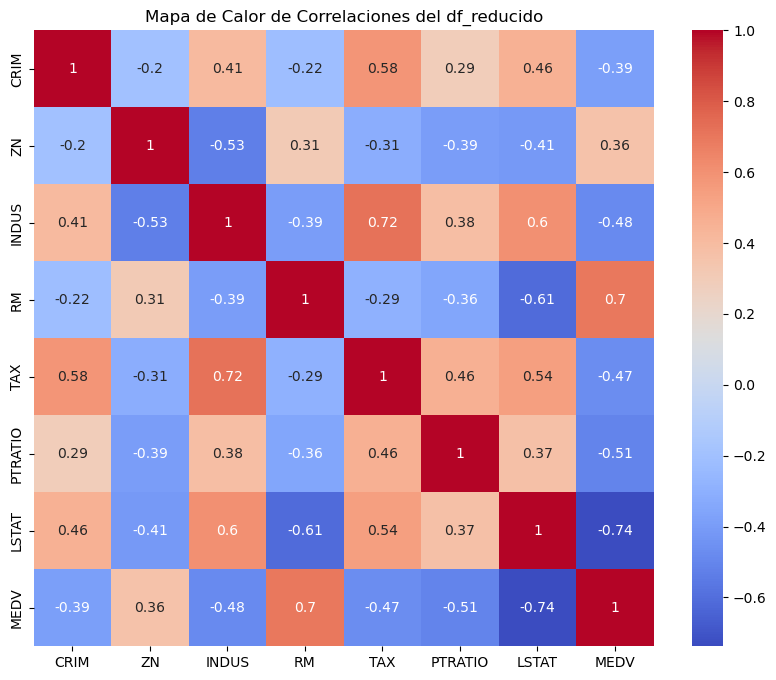

In [42]:
correlation_matrix = df_reducido.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones del df_reducido")
plt.show()

En el mapa de calor de correlaciones podemos observar lo siguiente:

- RM y MEDV (0.7): Existe una correlación positiva fuerte entre el número promedio de habitaciones por vivienda (RM) y el valor medio de las viviendas (MEDV). Esto sugiere que las viviendas con más habitaciones tienden a tener un valor más alto.

- LSTAT y MEDV (-0.74): Hay una correlación negativa fuerte entre el porcentaje de población de estatus bajo (LSTAT) y el valor medio de las viviendas (MEDV). Esto indica que en áreas con un mayor porcentaje de población de estatus bajo, el valor de las viviendas tiende a ser menor.

- CRIM y MEDV (-0.39): Se observa una correlación negativa moderada entre la tasa de criminalidad per cápita por ciudad (CRIM) y el valor medio de las viviendas (MEDV). Esto puede sugerir que a mayor criminalidad, menor es el valor de las viviendas en esa área.

- INDUS y MEDV (-0.48): La proporción de acres de negocio no minorista por ciudad (INDUS) tiene una correlación negativa moderada con el valor medio de las viviendas (MEDV), lo que podría indicar que las áreas con más actividad industrial tienden a tener viviendas de menor valor.

- TAX y MEDV (-0.47): La tasa de impuesto a la propiedad (TAX) tiene una correlación negativa moderada con MEDV. Áreas con impuestos más altos pueden tener valores de vivienda más bajos, lo que podría reflejar una variedad de factores económicos y sociales.

- PTRATIO y MEDV (-0.51): El ratio de estudiantes por profesor (PTRATIO) muestra una correlación negativa moderada con el valor medio de las viviendas (MEDV). Esto podría sugerir que las viviendas en áreas con escuelas más saturadas (más estudiantes por profesor) tienden a ser menos valiosas.

Las correlaciones positivas indican que cuando una variable aumenta, la otra también lo hace, mientras que las negativas indican que cuando una variable aumenta, la otra disminuye. Es importante tener en cuenta que la correlación no implica causalidad, y otros factores no medidos podrían influir en estas relaciones.

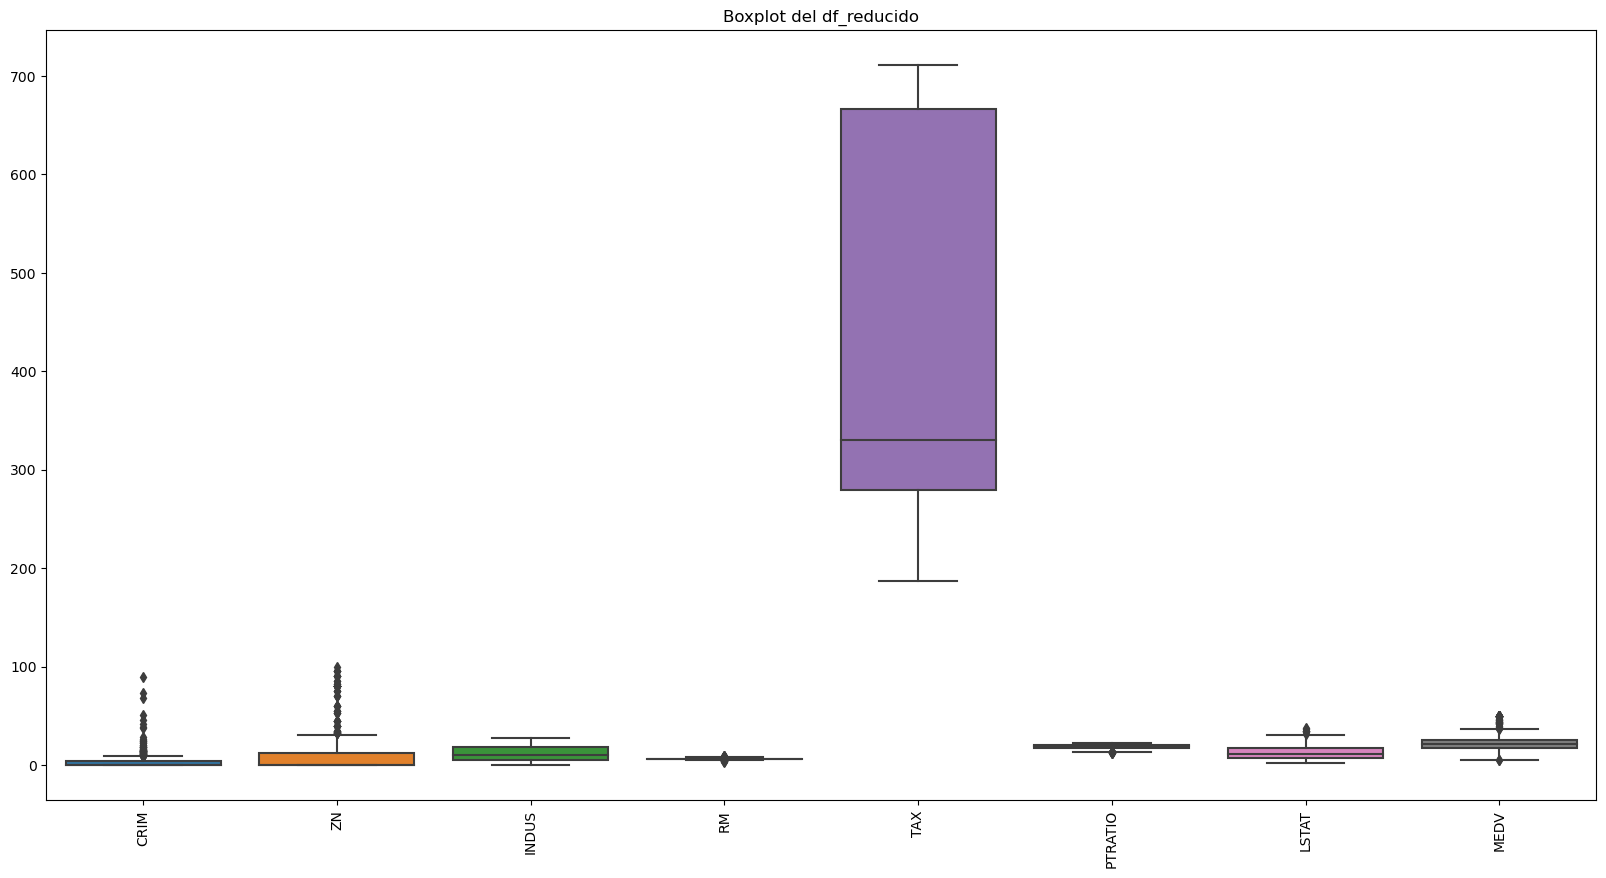

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_reducido)
plt.xticks(rotation=90)
plt.title('Boxplot del df_reducido')
plt.show()

En el boxplot podemos observar lo siguiente:

- CRIM: La variable CRIM, que representa la tasa de criminalidad per cápita por ciudad, tiene una distribución con muchos valores atípicos. Estos valores atípicos están muy por encima del rango "normal" (la caja del boxplot), lo que sugiere que hay ciudades con tasas de criminalidad particularmente altas.

- ZN: Esta variable representa la proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados. La mayoría de los valores están en el extremo inferior del rango, pero hay algunos valores atípicos que indican la presencia de áreas con una proporción inusualmente alta de zonificación residencial.

- INDUS: Representa la proporción de acres de negocio no minorista por ciudad. Los valores atípicos no son muy prominentes aquí, lo que sugiere que la mayoría de las ciudades tienen una proporción más homogénea de áreas de negocio no minorista.

- RM: Esta es la variable que indica el número promedio de habitaciones por vivienda. No parece tener valores atípicos, y la distribución es bastante estrecha, lo que sugiere que el número de habitaciones es bastante consistente a través de las viviendas.

- TAX: Representa la tasa de impuesto a la propiedad de valor total por $10,000. Esta variable muestra una distribución con algunos valores atípicos en el extremo superior, lo que indica que algunas ciudades tienen tasas de impuestos significativamente más altas que la mayoría.

- PTRATIO: Esta variable mide la proporción de estudiantes por profesor. No hay valores atípicos visibles en el boxplot, lo que sugiere que esta proporción es bastante consistente en las diferentes ciudades.

- LSTAT: Representa el porcentaje de población de estatus bajo. Hay algunos valores atípicos en ambos extremos de la distribución, lo que indica que hay ciudades con porcentajes inusualmente bajos y altos de población de estatus bajo.

- MEDV: Esta es la variable de valor medio de las viviendas ocupadas por sus propietarios. Hay algunos valores atípicos en el extremo superior, lo que sugiere que hay algunas viviendas que tienen un valor significativamente más alto que la tendencia general.

En general, los valores atípicos en un boxplot pueden indicar datos interesantes que podrían valer la pena investigar más a fondo, ya que pueden ser indicativos de errores en los datos, o de variaciones reales que son importantes para entender. Por ejemplo, las altas tasas de criminalidad en algunas ciudades podrían ser un área de interés para investigaciones adicionales en estudios de criminología o urbanismo.








In [44]:
# division train/test y procesos de estandarización
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Definir las variables independientes y la variable objetivo
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los escaladores
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Definir qué columnas escalar con cada escalador
columns_to_robust_scale = ['CRIM', 'ZN', 'TAX']
columns_to_minmax_scale = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']

# Aplicar RobustScaler a las columnas con valores atípicos
X_train_robust = robust_scaler.fit_transform(X_train[columns_to_robust_scale])
X_test_robust = robust_scaler.transform(X_test[columns_to_robust_scale])

# Aplicar MinMaxScaler a las columnas sin valores atípicos significativos
X_train_minmax = min_max_scaler.fit_transform(X_train[columns_to_minmax_scale])
X_test_minmax = min_max_scaler.transform(X_test[columns_to_minmax_scale])

# Reconstruir los DataFrames de entrenamiento y prueba con las columnas escaladas
X_train_scaled = pd.DataFrame(X_train_robust, columns=columns_to_robust_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_robust, columns=columns_to_robust_scale, index=X_test.index)

for col in columns_to_minmax_scale:
    X_train_scaled[col] = X_train_minmax[:, columns_to_minmax_scale.index(col)]
    X_test_scaled[col] = X_test_minmax[:, columns_to_minmax_scale.index(col)]

# Asegurarse de que las otras columnas no escaladas también se incluyan de nuevo en los DataFrames, si las hay
other_cols = list(set(X.columns) - set(columns_to_robust_scale) - set(columns_to_minmax_scale))
X_train_scaled[other_cols] = X_train[other_cols]
X_test_scaled[other_cols] = X_test[other_cols]

# Los conjuntos de datos escalados están listos para ser utilizados en el modelado
print(X_train_scaled.head())
print(X_test_scaled.head())



         CRIM    ZN       TAX     INDUS        RM   PTRATIO     LSTAT
477  4.729102  0.00  0.868217  0.642963  0.293065  0.808511  0.639625
15   0.117250  0.00 -0.059432  0.274074  0.400854  0.893617  0.185982
332 -0.072634  1.75 -0.067183  0.197037  0.440919  0.457447  0.168322
423  2.174908  0.00  0.868217  0.642963  0.455562  0.808511  0.594923
19   0.148777  0.00 -0.059432  0.274074  0.379093  0.893617  0.263521
         CRIM   ZN       TAX     INDUS        RM   PTRATIO     LSTAT
173 -0.054336  0.0 -0.087855  0.122593  0.519219  0.425532  0.201711
274 -0.065657  2.0 -0.196382  0.210000  0.588774  0.531915  0.049669
491 -0.049863  0.0  0.984496  1.000000  0.431157  0.797872  0.450883
72  -0.054380  0.0 -0.064599  0.372963  0.447834  0.702128  0.104581
452  1.546930  0.0  0.868217  0.642963  0.495017  0.808511  0.428808


He decidido usar RobustScaler y MinMaxScaler por las siguientes razones:

* RobustScaler:

Se utiliza para variables que tienen valores atípicos significativos, ya que este escalador es menos sensible a ellos. El RobustScaler elimina la mediana y escala los datos de acuerdo con el rango intercuartílico (IQR). Las variables seleccionadas para RobustScaler son:

CRIM: En el boxplot, CRIM muestra una gran cantidad de valores atípicos, con algunos valores extremadamente altos en comparación con la mediana. Usar RobustScaler asegura que la escala de esta variable no esté dominada por estos valores extremos.

ZN: Aunque la mayoría de los datos para ZN están agrupados cerca del valor más bajo, hay varios valores atípicos que indican zonas con proporciones inusualmente altas de terreno residencial. RobustScaler se ocupará adecuadamente de estos valores atípicos.

TAX: Al igual que con CRIM, hay varios valores atípicos en el extremo superior de la distribución de la variable TAX en el boxplot. Estos valores extremos podrían distorsionar la escala si se utilizara MinMaxScaler, por lo que RobustScaler es la opción preferida.

* MinMaxScaler:

Se utiliza para variables sin valores atípicos significativos o donde queremos preservar la distribución de los datos. Este escalador transforma las características escalando cada característica a un rango dado, típicamente [0, 1]. Las variables seleccionadas para MinMaxScaler son:

INDUS: Aunque INDUS tiene algunos valores atípicos, parece que no son tan extremos como en las variables seleccionadas para RobustScaler. El uso de MinMaxScaler puede ser adecuado si estos atípicos no son considerados significativos o si queremos mantener la distribución general de la variable.

RM: No muestra valores atípicos significativos en el boxplot y su distribución es relativamente normal. MinMaxScaler preservará esta distribución mientras escala los valores.

PTRATIO: Similar a RM, no tiene valores atípicos significativos visibles en el boxplot y usar MinMaxScaler garantizará que la distribución de la proporción de estudiantes por profesor se mantenga después de escalar.

LSTAT: A pesar de que LSTAT muestra algunos valores atípicos en ambos extremos, el número no parece ser tan grande como para justificar el uso de RobustScaler. Además, mantener la distribución relativa de los porcentajes de población de estatus bajo puede ser importante para el modelado.


Modelado de los datos con Random Forest

Random Forest es una elección sólida para modelar los datos debido a su robustez frente a valores atípicos y su capacidad para manejar relaciones no lineales entre las variables. Al ser menos sensible a los extremos que los modelos lineales, Random Forest puede ofrecer un rendimiento confiable incluso con la presencia de valores atípicos en variables como CRIM y TAX. Además, como un modelo de ensamblaje, reduce la varianza y ayuda a prevenir el sobreajuste, proporcionando así predicciones estables y confiables.

Este algoritmo también ofrece ventajas adicionales como la interpretación de la importancia de las variables, lo cual es útil para entender qué características influyen más en la predicción. Random Forest funciona bien con configuraciones predeterminadas, lo que minimiza la necesidad de ajustes complicados y lo convierte en una opción accesible y eficiente. Su flexibilidad y capacidad para capturar interacciones entre variables sin modelación explícita lo hacen adecuado para conjuntos de datos con características complejas.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
random_forest_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = random_forest_model.predict(X_test_scaled)

# Calcular el error cuadrático medio para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 10.898441500000006
Raíz del Error Cuadrático Medio (RMSE): 3.301278767386966
Coeficiente de determinación (R^2): 0.8513858002365194


Modelado de los datos con Gradient Boosting 

Gradient Boosting es un algoritmo apropiado para nuestro dataset gracias a su habilidad para optimizar tanto el sesgo como la varianza, lo que puede resultar en un modelo muy preciso. Es especialmente efectivo en conjuntos de datos que presentan características no lineales y complejas interacciones, que a menudo son evidentes en conjuntos de datos inmobiliarios con múltiples variables, como lo sugiere el mapa de calor. Gradient Boosting construye modelos de manera secuencial, corrigiendo errores de los árboles anteriores, lo que lo hace muy eficiente en la mejora continua del rendimiento del modelo.

La metodología de Gradient Boosting también proporciona la ventaja de poder manejar distintos tipos de datos y distribuciones, incluyendo la presencia de valores atípicos, aunque con menor tolerancia que Random Forest. Ofrece herramientas para interpretar la importancia de las características, lo que ayuda a comprender cuáles son los predictores más significativos de los valores de las viviendas. A pesar de que requiere un ajuste más cuidadoso de los hiperparámetros en comparación con Random Forest, el ajuste fino puede resultar en un modelo altamente optimizado y adecuado para predecir con precisión los precios de las viviendas basados en el df_reducido.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
gradient_boosting_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

# Calcular el coeficiente de determinación R^2
r2_gb = r2_score(y_test, y_pred_gb)

# Imprimir los resultados
print(f"Error Cuadrático Medio (MSE): {mse_gb}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_gb}")
print(f"Coeficiente de determinación (R^2): {r2_gb}")


Error Cuadrático Medio (MSE): 10.120465515237035
Raíz del Error Cuadrático Medio (RMSE): 3.181267910006486
Coeficiente de determinación (R^2): 0.861994498591303


### Ejercicio 2: Compárales en base al MSE y al R².


#### Error Cuadrático Medio (MSE):

* Random Forest: 10.8984
* Gradient Boosting: 10.1205

El MSE es menor en el modelo de Gradient Boosting, lo que indica que, en promedio, las predicciones de este modelo son ligeramente más cercanas a los valores reales.

#### Coeficiente de determinación (R^2):

* Random Forest: 0.8514
* Gradient Boosting: 0.8620

El R²es una medida de cuán bien las predicciones del modelo se ajustan a los datos reales. Un R² de 1 significa que el modelo explica perfectamente la variabilidad de los datos. En este caso, el modelo Gradient Boosting tiene un R² más alto, lo que significa que explica una proporción mayor de la varianza en la variable objetivo en comparación con el modelo Random Forest.

En conclusión, según estos resultados, el modelo Gradient Boosting supera ligeramente al modelo Random Forest tanto en términos de MSE como de R². Esto sugiere que Gradient Boosting puede ser un modelo más adecuado para este conjunto particular de datos. Sin embargo, la diferencia no es muy grande, por lo que otros factores como la interpretabilidad del modelo y el tiempo de entrenamiento también podrían considerarse al tomar una decisión final sobre qué modelo utilizar. Además, es importante realizar pruebas adicionales, como la validación cruzada, para confirmar la robustez de estos resultados antes de decidir qué modelo es el mejor

### Ejercicio 3: Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir el rango de parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Inicializar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # Número de folds en la validación cruzada
    n_jobs=-1,  # Usar todos los procesadores disponibles
    scoring='neg_mean_squared_error',  # MSE como métrica de evaluación
    verbose=2  # Mostrar más información durante el entrenamiento
)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo sobre el conjunto de prueba
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Calcular el MSE y el R^2 para el mejor modelo
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

#Imprimir los resultados
print(f"Mejor modelo Random Forest con GridSearchCV: {grid_search.best_params_}")
print(f"Error Cuadrático Medio (MSE) del mejor modelo Random Forest: {mse_best_rf,}")
print(f"Coeficiente de determinación (R^2) del mejor modelo Random Forest: {r2_best_rf}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Mejor modelo Random Forest con GridSearchCV: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Error Cuadrático Medio (MSE) del mejor modelo Random Forest: (13.675533304056517,)
Coeficiente de determinación (R^2) del mejor modelo Random Forest: 0.8135165988346879


El proceso de búsqueda en cuadrícula probó 324 combinaciones diferentes de hiperparámetros. Utilizó validación cruzada con 3 "folds" (subconjuntos de datos) para cada combinación de hiperparámetros. Esto significa que para cada conjunto de hiperparámetros, el conjunto de entrenamiento se dividió en 3 partes: se entrenó con 2 de ellas y se validó con la restante, repitiendo el proceso 3 veces de manera que cada parte fue utilizada para validación una vez. En total, se entrenaron y validaron 972 modelos (3 folds x 324 combinaciones de hiperparámetros).

Estos números representan el MSE, el RMSE, y el R², respectivamente, del mejor modelo encontrado por la búsqueda en cuadrícula.
- MSE: 13.6755 es el promedio del cuadrado de los errores entre las predicciones del modelo y los valores reales.
- RMSE: 3.6980 es la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que la variable objetivo.
- R²: 0.8135 es una medida estadística de qué tan bien las predicciones se aproximan a los datos reales. Un R² de 1 indica una predicción perfecta.

Estos son los mejores hiperparámetros encontrados para el modelo de Random Forest después de realizar la búsqueda en cuadrícula.
- bootstrap: False significa que no se utiliza el muestreo bootstrap para la construcción de los árboles (cada árbol utiliza todo el conjunto de datos de entrenamiento).
- max_depth: 20 indica la profundidad máxima que puede tener cada árbol.
- max_features: 'sqrt' significa que cada árbol solo considerará la raíz cuadrada del número total de características al buscar la mejor división.
- min_samples_leaf: 1 indica el número mínimo de muestras que debe tener una hoja del árbol.
- min_samples_split: 5 es el número mínimo de muestras necesarias para dividir un nodo interno.
- n_estimators: 200 es el número de árboles en el bosque.

En conclusión, el resultado muestra que después de un extenso proceso de búsqueda y validación, el mejor modelo de Random Forest encontrado tiene un MSE de aproximadamente 13.68, un RMSE de aproximadamente 3.70 y un R²de aproximadamente 0.81, utilizando la combinación específica de hiperparámetros proporcionada.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir el espacio de parámetros para la búsqueda en cuadrícula
param_grid_gb = {
    'n_estimators': [100, 200, 300],   # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 4, 5],            # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras requeridas en un nodo hoja
    'subsample': [0.8, 0.9, 1.0]       # Fracción de muestras para el entrenamiento de cada árbol
}

# Inicializar el modelo de Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb, 
    param_grid=param_grid_gb, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=2, 
    n_jobs=-1
)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search_gb.fit(X_train_scaled, y_train)

# Mejor modelo encontrado por GridSearchCV
best_gb_model = grid_search_gb.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Calcular MSE y R^2 para el mejor modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Imprimir los resultados
print(f"Mejor modelo Gradient Boosting con GridSearchCV: {grid_search_gb.best_params_}")
print(f"Error Cuadrático Medio (MSE) del mejor modelo Gradient Boosting: {mse_gb}")
print(f"Coeficiente de determinación (R^2) del mejor modelo Gradient Boosting: {r2_gb}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


Mejor modelo Gradient Boosting con GridSearchCV: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Error Cuadrático Medio (MSE) del mejor modelo Gradient Boosting: 8.990041735958128
Coeficiente de determinación (R^2) del mejor modelo Gradient Boosting: 0.8774092737544439


Se probaron 729 combinaciones únicas de parámetros (hiperparámetros) para el modelo Gradient Boosting.
Se utilizó la validación cruzada de 5 folds para cada combinación de hiperparámetros. Esto significa que para cada conjunto de hiperparámetros, el conjunto de entrenamiento se dividió en 5 partes. El modelo se entrenó en 4 de estas partes y se validó en la quinta, repitiendo el proceso 5 veces con diferentes partes utilizadas como el conjunto de validación cada vez.
En total, el proceso de búsqueda en cuadrícula entrenó y evaluó 3645 modelos diferentes (5 folds × 729 combinaciones de parámetros).

Podemos observar que los parámetros listados son la mejor combinación encontrada por GridSearchCV que resultó en el menor error cuadrático medio durante la validación cruzada. 

Los parámetros son:

- learning_rate: 0.1 - La tasa a la que el modelo aprende. Un valor más alto puede conducir a un aprendizaje más rápido, pero también a un sobreajuste.
- max_depth: 4 - La profundidad máxima de los árboles individuales.
- min_samples_leaf: 2 - El número mínimo de muestras requeridas para ser una hoja de un árbol.
- min_samples_split: 10 - El número mínimo de muestras requeridas para dividir un nodo interno.
- n_estimators: 100 - El número de árboles secuenciales en el proceso de boosting.
- subsample: 0.8 - La fracción de muestras para entrenar cada árbol individual, lo que puede ayudar a prevenir el sobreajuste.

Por otro lado, el 8.9900 es el MSE calculado para las predicciones del mejor modelo Gradient Boosting en el conjunto de prueba. Un MSE más bajo indica un mejor rendimiento del modelo, ya que significa que las predicciones están más cerca de los valores reales.

Ademas, el 0.8774 es el R² para el mejor modelo. Esta métrica proporciona una medida de cuánto de la varianza en la variable dependiente puede ser explicada por el modelo. Un R² de 1 significaría que el modelo explica perfectamente toda la varianza. Un R² de 0.8774 es bastante alto, lo que indica que el modelo tiene un buen ajuste y es capaz de explicar una gran parte de la variabilidad de los datos de prueba.

En definitiva, el resultado sugiere que después de un extenso proceso de búsqueda y validación, el modelo Gradient Boosting ajustado con la combinación de hiperparámetros proporcionada tiene un buen rendimiento en el conjunto de prueba, con un equilibrio adecuado entre sesgo y varianza, como se refleja en las métricas de MSE y R².


###  Ejercicio 4: Compara su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).


Para realizar una validación interna del modelo Random Forest utilizando los mejores hiperparámetros, vamos a emplear la técnica de validación cruzada, que es un método robusto y comúnmente utilizado. Esta técnica te permite evaluar el rendimiento del modelo utilizando todo el conjunto de datos para entrenamiento y prueba, pero en diferentes iteraciones, para evitar el sesgo de evaluar el modelo en los mismos datos con los que fue entrenado.

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definir el mejor modelo de Random Forest según los resultados del GridSearchCV
best_rf_model = RandomForestRegressor(
    bootstrap=False, 
    max_depth=20, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200,
    random_state=42
)

# Realizar validación cruzada para MSE
cv_scores_mse_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mean_cv_mse_rf = -np.mean(cv_scores_mse_rf)
std_dev_cv_mse_rf = np.std(cv_scores_mse_rf)

# Realizar validación cruzada para R²
cv_scores_r2_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')

# Calcular el R² promedio de la validación cruzada
mean_cv_r2_rf = np.mean(cv_scores_r2_rf)
std_dev_cv_r2_rf = np.std(cv_scores_r2_rf)

# Imprimir los resultados
print(f"MSE promedio de Random Forest con validación cruzada: {mean_cv_mse_rf}")
print(f"Desviación estándar del MSE en la validación cruzada: {std_dev_cv_mse_rf}")
print(f"R² promedio de Random Forest con validación cruzada: {mean_cv_r2_rf}")
print(f"Desviación estándar del R² en la validación cruzada: {std_dev_cv_r2_rf}")


MSE promedio de Random Forest con validación cruzada: 21.62631394752459
Desviación estándar del MSE en la validación cruzada: 12.386554297220917
R² promedio de Random Forest con validación cruzada: 0.6227830784859181
Desviación estándar del R² en la validación cruzada: 0.19365709874429804


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Definir el mejor modelo de Gradient Boosting según los resultados del GridSearchCV
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1, 
    max_depth=4, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    n_estimators=100, 
    subsample=0.8,
    random_state=42
)

# Realizar validación cruzada para MSE
cv_scores_mse_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mean_cv_mse_gb = -np.mean(cv_scores_mse_gb)
std_dev_cv_mse_gb = np.std(cv_scores_mse_gb)

# Realizar validación cruzada para R²
cv_scores_r2_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='r2')

# Calcular el R² promedio de la validación cruzada
mean_cv_r2_gb = np.mean(cv_scores_r2_gb)
std_dev_cv_r2_gb = np.std(cv_scores_r2_gb)

# Imprimir los resultados
print(f"MSE promedio de Gradient Boosting con validación cruzada: {mean_cv_mse_gb}")
print(f"Desviación estándar del MSE en la validación cruzada: {std_dev_cv_mse_gb}")
print(f"R² promedio de Gradient Boosting con validación cruzada: {mean_cv_r2_gb}")
print(f"Desviación estándar del R² en la validación cruzada: {std_dev_cv_r2_gb}")


MSE promedio de Gradient Boosting con validación cruzada: 24.466030867411888
Desviación estándar del MSE en la validación cruzada: 11.789141073458197
R² promedio de Gradient Boosting con validación cruzada: 0.5499760819394541
Desviación estándar del R² en la validación cruzada: 0.26946805059615236


Los resultados de la validación cruzada para los modelos Random Forest y Gradient Boosting revelan algunas diferencias clave en su rendimiento. 

El modelo Random Forest tiene un MSE promedio más bajo que el Gradient Boosting. Un MSE más bajo indica que las predicciones del modelo están, en promedio, más cerca de los valores reales. La desviación estándar más baja del MSE en Random Forest sugiere también una mayor consistencia en sus predicciones a través de diferentes iteraciones de la validación cruzada.

El Random Forest también tiene un R² promedio más alto, lo que implica que es más eficaz en explicar la varianza en los datos objetivo.
La menor desviación estándar del R² en Random Forest sugiere que su rendimiento es más consistente a través de diferentes divisiones de datos en comparación con Gradient Boosting.

Estos resultados indican que, para este conjunto de datos específico y con los hiperparámetros seleccionados, el modelo Random Forest generalmente supera al modelo Gradient Boosting en términos de MSE y R². Es importante tener en cuenta que aunque Gradient Boosting no superó a Random Forest en estas métricas, podría tener ventajas en otros aspectos como la capacidad de manejar datos no lineales o la importancia de las características.

La elección del modelo también depende de factores como el tipo de problema, la interpretación del modelo, la velocidad de entrenamiento y predicción, y cómo se relacionan estas métricas con los objetivos empresariales o prácticos. Podría ser útil realizar pruebas adicionales, como ajustar aún más los hiperparámetros, para explorar si se pueden mejorar los resultados de Gradient Boosting o si hay otros aspectos en los que pueda superar al Random Forest. En resumen, en base a la validación cruzada, el modelo Random Forest parece tener un mejor rendimiento para este conjunto de datos particular en términos de consistencia y precisión de las predicciones.



### Ejercicio 5: No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [51]:
# Eliminar la variable RM del dataset

# Definir las variables independientes y la variable objetivo
X = df.drop(labels=['MEDV', 'RM'], axis=1)
y = df['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    

In [52]:
# Volvemos a aplicar el modelo Random Forest con los mejores hiperparametros

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Mejores parámetros del modelo determinados previamente
best_rf_model = RandomForestRegressor(
    bootstrap=False, 
    max_depth=20, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200,
    random_state=42
)

# Ajustar el modelo a los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de las pruebas
rf_predictions = best_rf_model.predict(X_test)

# Calcular el MSE
rf_mse = mean_squared_error(y_test, rf_predictions)

# Imprimir MSE
print(f"Random Forest MSE: {rf_mse}")



Random Forest MSE: 17.847707807835942


In [53]:
# Volvemos a aplicar el modelo Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

# Configuración de best_gb_model
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1, 
    max_depth=4,
    min_samples_leaf=2, 
    min_samples_split=10, 
    n_estimators=100, 
    subsample=0.8, 
    random_state=42
)

# Obtén los parámetros de best_gb_model
best_gb_params = best_gb_model.get_params()

# Crea una nueva instancia de GradientBoostingRegressor con los mismos parámetros
gb_model = GradientBoostingRegressor(**best_gb_params)

# Entrena el nuevo modelo
gb_model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de pruena
gb_predictions = gb_model.predict(X_test)

# Calculamos el MSE
gb_mse = mean_squared_error(y_test, gb_predictions)

# Imprimimos el MSE
print(f'Gradient Boosting MSE: {gb_mse}')

Gradient Boosting MSE: 14.466918459657208


Haciendo un analisis comparativo de los resultados con la variable "RM" y sin ella podemos inferir lo siguiente:

Con la variable "RM" incluida:

- Random Forest MSE: 21.62631394752459
- Gradient Boosting MSE: 24.466030867411888

Sin la variable "RM":

- Random Forest MSE: 17.847707807835942
- Gradient Boosting MSE: 14.466918459657208

Para el modelo Random Forest, la eliminación de la variable "RM" ha mejorado el rendimiento del modelo, reduciendo el MSE de 21.63 a 17.85. Esto sugiere que, para este conjunto de datos y este modelo específico, la variable "RM" no estaba contribuyendo positivamente a la predicción del modelo, o incluso estaba introduciendo ruido.

Para el Gradient Boosting, es similar al Random Forest, la eliminación de "RM" ha mejorado significativamente el rendimiento del modelo, reduciendo el MSE de 24.47 a 14.47. Esto indica que, para el Gradient Boosting, la variable "RM" también estaba afectando negativamente la capacidad predictiva del modelo.

En conclusión, la eliminación de la variable "RM" ha resultado en una mejora sustancial en el rendimiento de ambos modelos de regresión. Esto puede deberse a varias razones, como que "RM" no era una variable relevante para la predicción, estaba correlacionada con otras variables, o introducía variabilidad que no era útil para los modelos.